# Setting Up

In [48]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install clusteval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly as py
import plotly.graph_objs as go
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected="True")

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.stats import probplot
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from datetime import date
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [51]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [52]:
# df = pd.read_csv('/content/bank_sliced.csv')
# df.head()

In [53]:
df = pd.read_csv('/content/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50


In [54]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

# K-Means Clustering

In [55]:
# Segmentation 'CustAccountBalance' dan 'TransactionTime'
# Masukkan 10 baris pertama dari 'CustAccountBalance', 'TransactionTime'
x_old = df.iloc[range(20001, 25000) , [5, 8]] 
x_old = np.array(x_old)
x_old = StandardScaler().fit_transform(x_old)
x_new = x_old[np.isfinite(x_old).all(1)] # Mengubah data yang infinite menjadi 1
x_new

array([[-0.20038828, -0.26040021],
       [-0.20433689, -0.23305966],
       [-0.21287611, -0.24229389],
       ...,
       [-0.18247458, -0.25587363],
       [-0.21185133, -0.21459121],
       [-0.21172484, -0.27547916]])

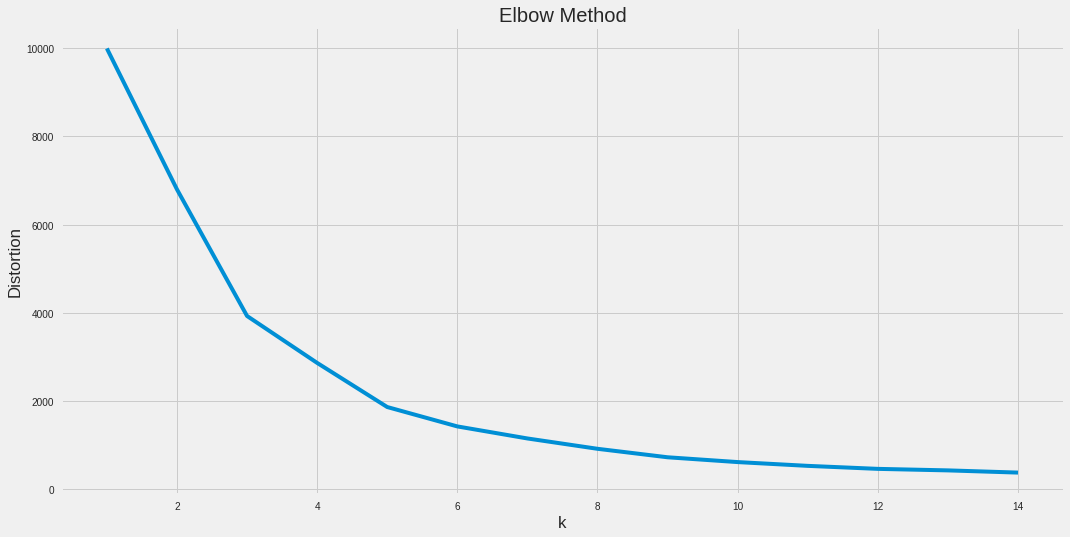

In [56]:
# Mengumpulkan distortions ke dalam bentuk list
distortions = []
K = range(1,15)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x_new)
 distortions.append(kmeanModel.inertia_)
 
# Memplotting distorsions-nya
plt.figure(figsize=(16,8))
plt.plot(K, distortions, '-x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [57]:
algorithm = KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
algorithm.fit(x_new)
labels1 = algorithm.labels_
print(labels1)
centroids1 = algorithm.cluster_centers_

[0 0 0 ... 0 0 0]


In [58]:
h = 0.02
x_min, x_max = x_new[:, 0].min() - 1, x_new[:, 0].max() + 1
y_min, y_max = x_new[:, 1].min() - 1, x_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

In [59]:
# menentukan style dari histogram menggunakan library plotly
plt.style.use('fivethirtyeight')

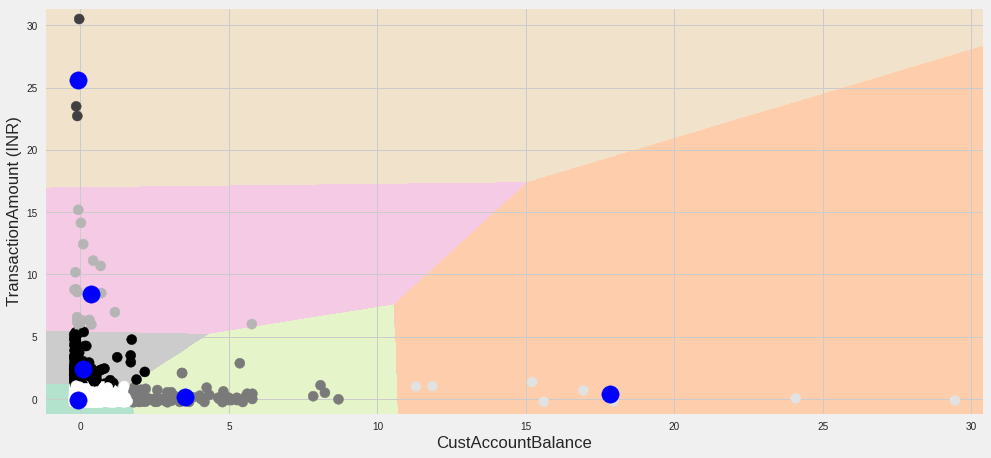

In [60]:
# penggambaran cluster
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = x_new[:, 0] , y = x_new[:, 1] , c = labels1 , s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'blue' , alpha = 1)
plt.ylabel('TransactionAmount (INR)') , plt.xlabel('CustAccountBalance')
plt.show()

In [61]:
silhouette = str(np.round(silhouette_score(x_new,labels1)*100,2)) + '%'
silhouette

'84.97%'

# Hierarchical Clustering

In [62]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from yellowbrick.cluster import KElbowVisualizer

In [63]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
from sklearn import preprocessing
x_new_normalize = preprocessing.normalize(x_new)
x_new_normalize

array([[-0.60986453, -0.79250568],
       [-0.65925289, -0.75192129],
       [-0.66002919, -0.75123996],
       ...,
       [-0.58062216, -0.81417314],
       [-0.70254914, -0.71163524],
       [-0.60938124, -0.79287735]])

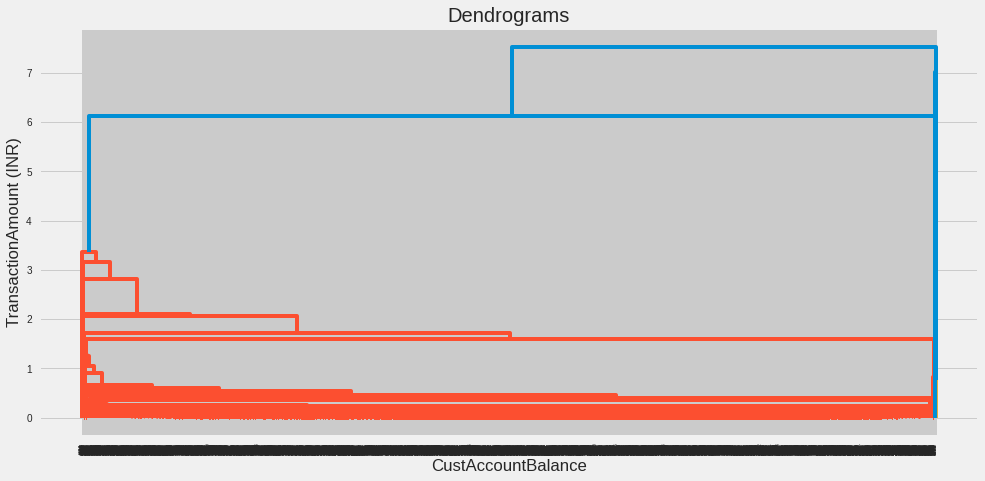

In [65]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=( 15, 7))  
plt.title("Dendrograms")  
plt.xlabel('CustAccountBalance') # label of the x-axis
plt.ylabel('TransactionAmount (INR)')
dend = shc.dendrogram(shc.linkage(x_new, method='single'))
plt.autoscale(enable = True)
plt.show()

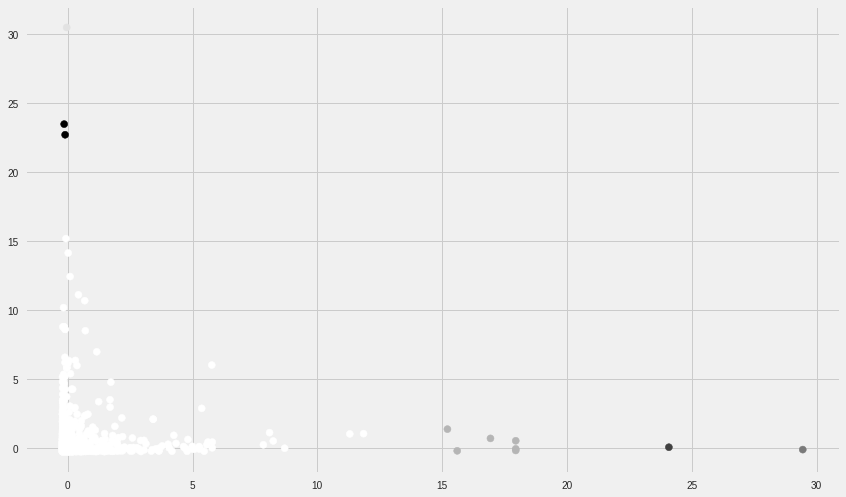

In [66]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')  
cluster.fit_predict(x_new)

plt.figure(figsize=(13, 8))  
plt.scatter(x_new[:,0], x_new[:,1], c=cluster.labels_) 

plt.legend()
plt.show()

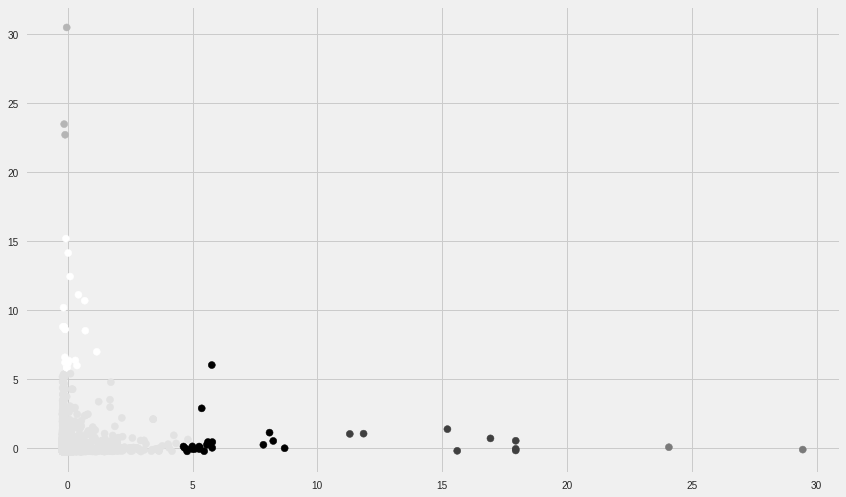

In [67]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')  
cluster.fit_predict(x_new)

plt.figure(figsize=(13, 8))  
plt.scatter(x_new[:,0], x_new[:,1], c=cluster.labels_) 

plt.legend()
plt.show()

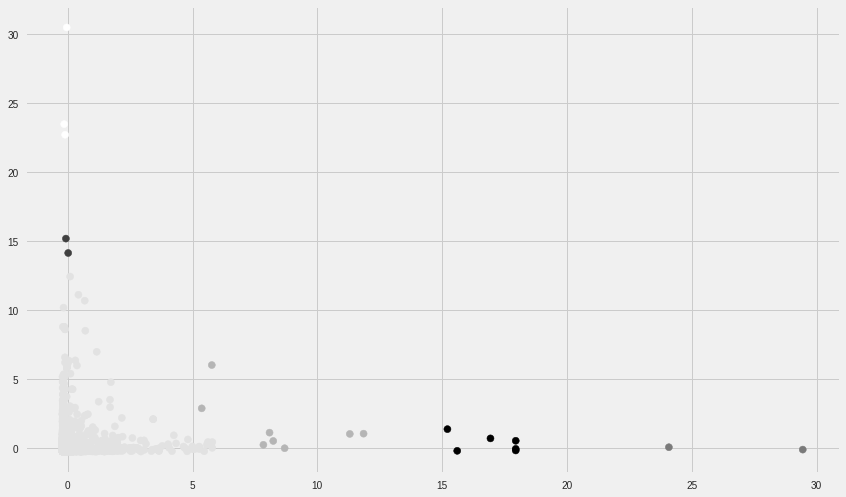

In [68]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')  
cluster.fit_predict(x_new)

plt.figure(figsize=(13, 8))  
plt.scatter(x_new[:,0], x_new[:,1], c=cluster.labels_) 

plt.legend()
plt.show()

In [75]:
from clusteval import clusteval
ce = clusteval(cluster='kmeans',savemem=True,verbose=4)
results = ce.fit(np.reshape(np.ravel(x_new),(-1,1)))
cluster_labels = results['labx']


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.
[clusteval] >Save memory enabled for kmeans with evaluation silhouette.


100%|██████████| 23/23 [00:24<00:00,  1.09s/it]

[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


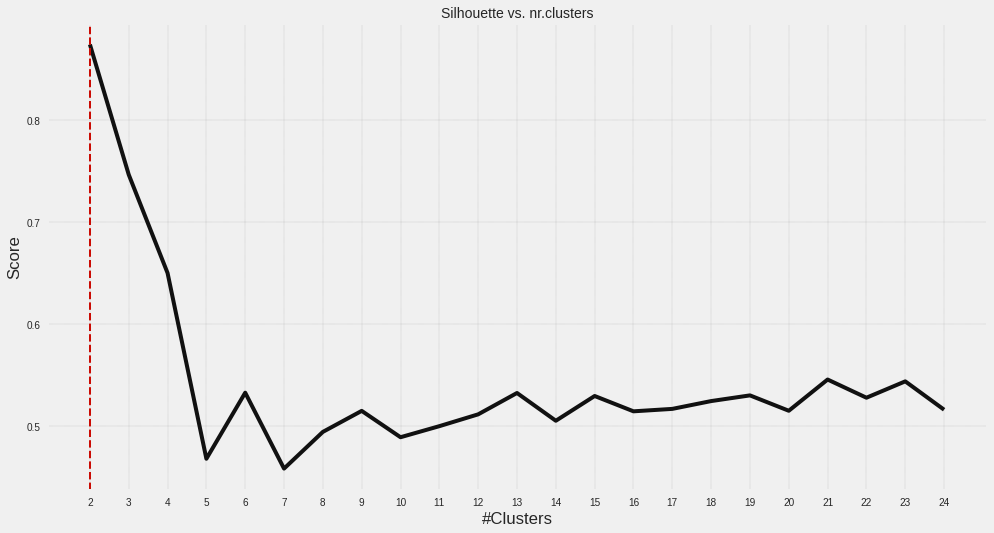

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff49e0a9710>)

In [76]:
ce.plot()